In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Cargar los datos 
df_internet = pd.read_csv("/Users/chants/Desktop/DM_TEL_cucalon/Data/raw/megaline_internet.csv")
df_usuarios = pd.read_csv("/Users/chants/Desktop/DM_TEL_cucalon/Data/raw/megaline_users.csv")
df_calls = pd.read_csv("/Users/chants/Desktop/DM_TEL_cucalon/Data/RAW/megaline_calls.csv")

In [3]:
# Mostrar información general
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
# Ver primeras filas
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
# Ver valores nulos por columna
print("\nValores nulos por columna:")
print(df_internet.isnull().sum())


Valores nulos por columna:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [13]:
# Ver duplicados
print("\nFilas duplicadas:", df_internet.duplicated().sum())


Filas duplicadas: 0


In [14]:
# Estadísticas descriptivas
display(df_internet.describe())

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



Resumen de outliers:
{'user_id': 0, 'mb_used': 424}


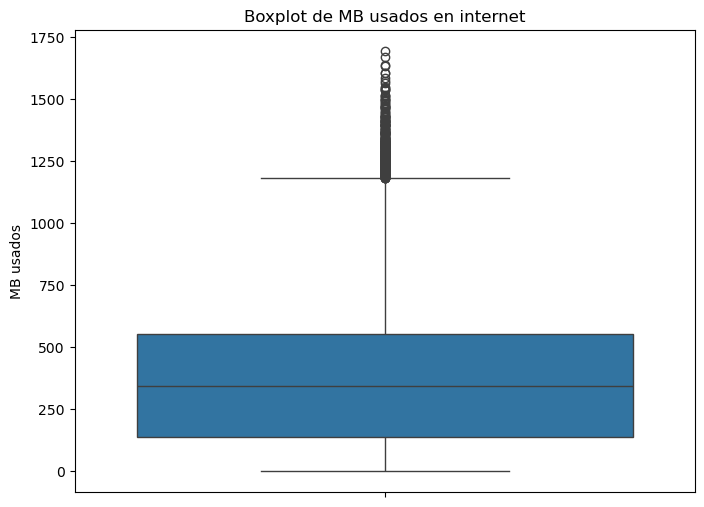

In [15]:
# Detección de Outliers usando IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_summary = {}
for col in df_internet.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(df_internet, col)
    outliers_summary[col] = len(outliers)

print("\nResumen de outliers:")
print(outliers_summary)

# Visualización de outliers con boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_internet["mb_used"])
plt.title("Boxplot de MB usados en internet")
plt.ylabel("MB usados")
plt.show()

In [17]:
# Unir df_internet con df_users en base a user_id
df_internet_merged = df_internet.merge(df_usuarios, on="user_id", how="left")

# Verificar los datos después de la unión
print(df_internet_merged.head())


         id  user_id session_date  mb_used first_name last_name  age  \
0   1000_13     1000   2018-12-29    89.86   Anamaria     Bauer   45   
1  1000_204     1000   2018-12-31     0.00   Anamaria     Bauer   45   
2  1000_379     1000   2018-12-28   660.40   Anamaria     Bauer   45   
3  1000_413     1000   2018-12-26   270.99   Anamaria     Bauer   45   
4  1000_442     1000   2018-12-27   880.22   Anamaria     Bauer   45   

                                    city    reg_date      plan churn_date  
0  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate        NaN  
1  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate        NaN  
2  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate        NaN  
3  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate        NaN  
4  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate        NaN  


In [18]:
# Calcular correlación entre MB usados y edad
correlation_age = df_internet_merged[["mb_used", "age"]].corr()
print("Correlación entre MB usados y edad:\n", correlation_age)

# Comparar la media de MB usados por grupo de edad
df_internet_merged.groupby(pd.cut(df_internet_merged["age"], bins=[18, 30, 40, 50, 60, 80]))["mb_used"].mean()

Correlación entre MB usados y edad:
           mb_used       age
mb_used  1.000000 -0.002515
age     -0.002515  1.000000


/var/folders/ws/xnp5l9k56zggyb_d7zfv75rm0000gn/T/ipykernel_8772/2594368903.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_internet_merged.groupby(pd.cut(df_internet_merged["age"], bins=[18, 30, 40, 50, 60, 80]))["mb_used"].mean()


age
(18, 30]    360.713106
(30, 40]    371.157056
(40, 50]    368.870908
(50, 60]    363.309048
(60, 80]    369.222417
Name: mb_used, dtype: float64

In [19]:
# Uso de MB por ciudad
city_usage = df_internet_merged.groupby("city")["mb_used"].mean().sort_values(ascending=False)
print("Top ciudades con mayor uso de MB:\n", city_usage.head(10))

# Uso de MB por estado (extraerlo de la columna de ciudad si es necesario)
df_internet_merged["state"] = df_internet_merged["city"].apply(lambda x: x.split(",")[-1].strip())
state_usage = df_internet_merged.groupby("state")["mb_used"].mean().sort_values(ascending=False)
print("Top estados con mayor uso de MB:\n", state_usage.head(10))

Top ciudades con mayor uso de MB:
 city
Albany-Schenectady-Troy, NY MSA    525.789962
Colorado Springs, CO MSA           509.989767
Tulsa, OK MSA                      506.238769
Greensboro-High Point, NC MSA      502.926515
Buffalo-Cheektowaga, NY MSA        448.047466
Baton Rouge, LA MSA                440.805222
Fresno, CA MSA                     439.595550
Grand Rapids-Kentwood, MI MSA      429.146887
Urban Honolulu, HI MSA             424.695793
Raleigh-Cary, NC MSA               419.109062
Name: mb_used, dtype: float64
Top estados con mayor uso de MB:
 state
NC MSA             486.571890
HI MSA             424.695793
PA-NJ-DE-MD MSA    411.899557
MN-WI MSA          411.671616
UT MSA             410.290035
TN-MS-AR MSA       406.668788
LA MSA             404.585432
DC-VA-MD-WV MSA    399.677700
NY MSA             395.554811
KY-IN MSA          389.458152
Name: mb_used, dtype: float64


Usuarios en Albany y Colorado Springs usan más MB que otros lugares
Carolina del Norte (NC) tiene el mayor consumo promedio de MB
Ubicación sí influye en el uso de datos